In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

import pickle

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def create_dataset(train, test):
    
    trainX = featureScaler.transform(train[features])
    trainY = targetScaler.transform(train[target])
    
    testX = featureScaler.transform(test[features])
    testY = targetScaler.transform(test[target])
    
    X_train = np.array(trainX)
    Y_train = np.array(trainY)
    
    X_test = np.array(testX)
    Y_test = np.array(testY)

    return (trainX, trainY), (testX,testY)    

def plot_predictions(predictions):
    #inverse scale the predictions
    predictions = targetScaler.inverse_transform(predictions)
    #predictions = pd.DataFrame([None]*WINDOW_SIZE + predictions.reshape(-1).tolist(), index=test_df.index)[0]
    predictions = pd.DataFrame(predictions.reshape(-1).tolist(), index=test_df.index)[0]
    
    train_df[target].plot(color='red')
    test_df[target].plot(color='blue')
    predictions.plot(color='green')
    
def compare_pred(predictions):
    predictions = targetScaler.inverse_transform(predictions)
    #predictions = pd.DataFrame([None]*WINDOW_SIZE + predictions.reshape(-1).tolist(), index=test_df.index)[0]

    predictions = pd.DataFrame(predictions.reshape(-1).tolist(), index=test_df.index)[0]
    test_df[target].plot(color='blue')
    predictions.plot(color='green')

def calculate_r2(predictions, ground_truth):
    predictions = targetScaler.inverse_transform(predictions)
    score = r2_score(predictions, ground_truth)*100
    return score

In [ ]:
!pip install tabulate
from tabulate import tabulate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#OLD

In [ ]:
LOCAL = False

if LOCAL:
    data = pd.read_csv('Final_df.csv')
    
else:
    data = pd.read_csv("/content/gdrive/My Drive/capstone project/modified datasets/Final_df(1).csv")

data.index=pd.to_datetime(data['Date'],format='%Y-%m-%d')

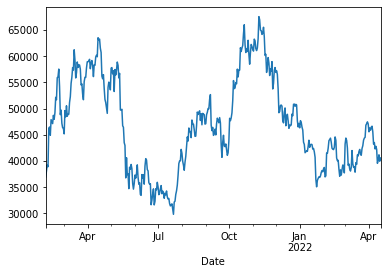

In [ ]:
data['Open'].plot()

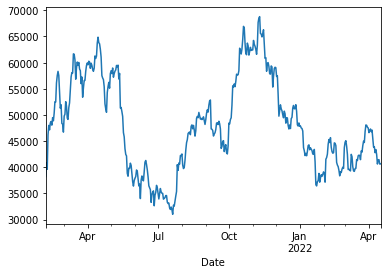

In [ ]:
data['High'].plot()

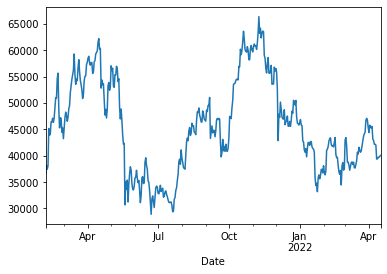

In [ ]:
data['Low'].plot()

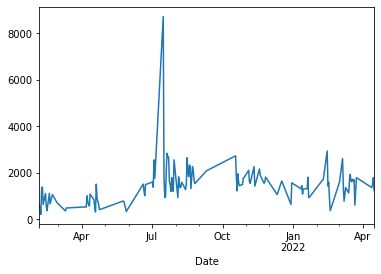

In [ ]:
data['Avg_score'].plot()

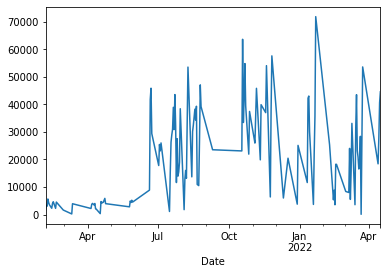

In [ ]:
data['Tweet_volume'].plot()

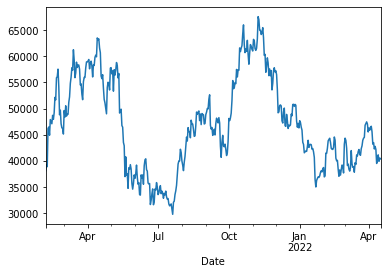

In [ ]:
data['Close'].plot()

##Only Tweet Data

In [ ]:
df = data.copy()
a=[]
b=[]

[48757.67644083 17151.68797814  1494.09202732]
[48795.80983607]
MSE for Logistic Regression Baseline : 0.02097672370309931
(131, 3) (131, 1)


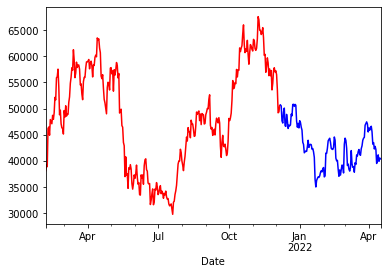

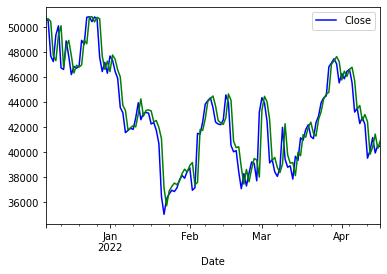

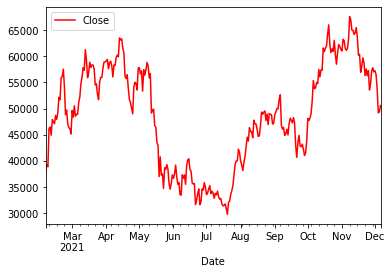

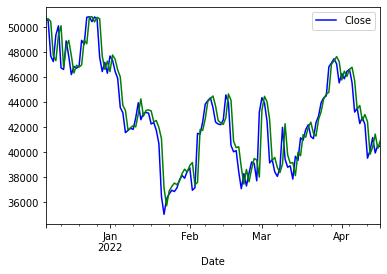

In [ ]:

train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['Open', 'Tweet_volume',	'Avg_score']
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)
print(targetScaler.mean_)

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)

for i in features:
  a.append(i+"_mean")
a.append(target[0]+"_mean")
for i in featureScaler.mean_:
  b.append(i)
b.append(targetScaler.mean_)
a+=["MSE","R2 score on Training set","R2 score on Testing Accuracy"]

b.append(loss)

In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

R2 for Linear Regression model -> 95.78%


In [ ]:
# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

R2 for Linear Regression model -> 86.67%


In [ ]:
from prettytable import PrettyTable
A = PrettyTable()
A.add_column("ONLY TWEET AGGREGATES",a)
A.add_column("",b)
print(A)

+------------------------------+---------------------+
|    ONLY TWEET AGGREGATES     |                     |
+------------------------------+---------------------+
|          Open_mean           |  48757.67644082992  |
|      Tweet_volume_mean       |  17151.68797814208  |
|        Avg_score_mean        |  1494.0920273165386 |
|          Close_mean          |   [48795.80983607]  |
|             MSE              | 0.02097672370309931 |
|   R2 score on Training set   |        95.78%       |
| R2 score on Testing Accuracy |        86.67%       |
+------------------------------+---------------------+


##Both

In [ ]:
df = data.copy()
a=[]
b=[]

[48757.67644083 50116.59904585 47200.23903048 17151.68797814
  1494.09202732]
[48795.80983607]
MSE for Logistic Regression Baseline : 0.0038054912093926385
(131, 5) (131, 1)


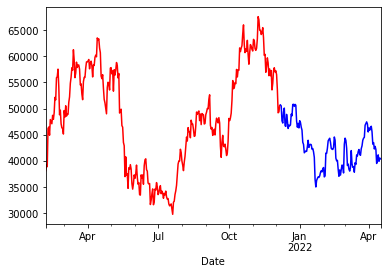

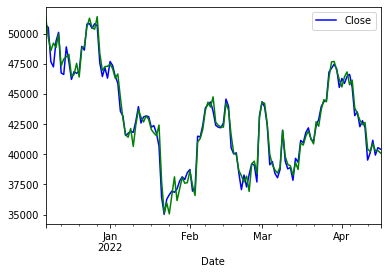

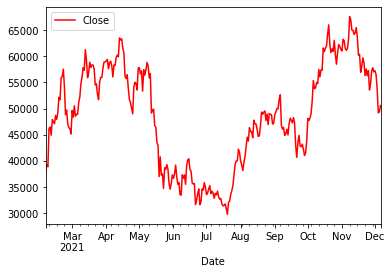

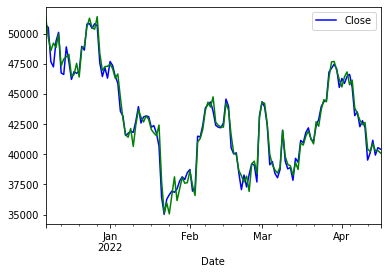

In [ ]:

train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['Open',	"High","Low","Tweet_volume","Avg_score"]
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)
print(targetScaler.mean_)


(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)

for i in features:
  a.append(i+"_mean")
a.append(target[0]+"_mean")
for i in featureScaler.mean_:
  b.append(i)
b.append(targetScaler.mean_)
a+=["MSE","R2 score on Training set","R2 score on Testing Accuracy"]

b.append(loss)

In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

R2 for Linear Regression model -> 99.31%


In [ ]:
# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

R2 for Linear Regression model -> 97.75%


In [ ]:
from prettytable import PrettyTable
A = PrettyTable()
A.add_column("TWEET AGGREGATES and PRICES",a)
A.add_column("",b)
print(A)

+------------------------------+-----------------------+
| TWEET AGGREGATES and PRICES  |                       |
+------------------------------+-----------------------+
|          Open_mean           |   48757.67644082992   |
|          High_mean           |   50116.59904585041   |
|           Low_mean           |   47200.239030481556  |
|      Tweet_volume_mean       |   17151.68797814208   |
|        Avg_score_mean        |   1494.0920273165386  |
|          Close_mean          |    [48795.80983607]   |
|             MSE              | 0.0038054912093926385 |
|   R2 score on Training set   |         99.31%        |
| R2 score on Testing Accuracy |         97.75%        |
+------------------------------+-----------------------+


#NEW

##only tweet data

In [ ]:
LOCAL = False

if LOCAL:
    data = pd.read_csv('Final_df.csv')
    
else:
    data = pd.read_csv("/content/gdrive/My Drive/capstone project/modified datasets/Final_df_2.csv")

In [ ]:
data.drop(["Unnamed: 0","Adj Close","Volume"],axis=1,inplace=True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Tweet_volume,Avg_score,sum_followers,sum_prof
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,1694.0,0.146160,7.683060e+06,0.0
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,3278.0,0.150722,1.657918e+07,0.0
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,3030.0,0.155368,1.203219e+07,0.0
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,5647.0,0.171374,4.810007e+07,0.0
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,4350.0,0.166602,3.187073e+07,0.0


In [ ]:
df=data.copy()

[4.87576764e+04 1.71516880e+04 2.36750120e-01 1.57799446e+08
 2.13278689e+00]
MSE for Logistic Regression Baseline : 0.021285754884345042
(131, 5) (131, 1)


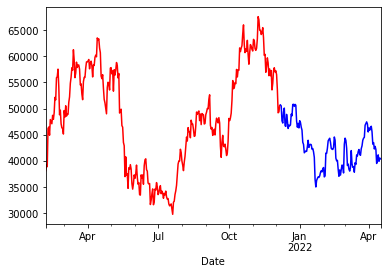

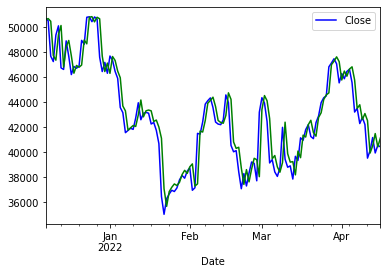

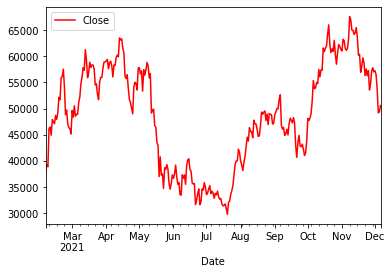

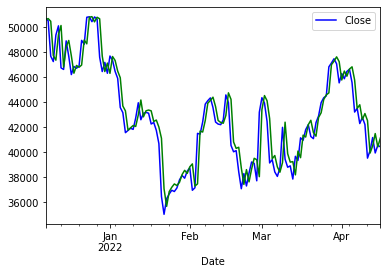

In [ ]:
df.index=pd.to_datetime(df['Date'],format='%Y-%m-%d')
# interpolate missing values 

df.interpolate(method='time', inplace=True)

train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['Open',	'Tweet_volume',	'Avg_score',"sum_followers","sum_prof"]
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)


In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')

R2 for Linear Regression model -> 95.78%


In [ ]:
# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')

R2 for Linear Regression model -> 86.46%


##only prices


In [ ]:
df=data.copy()

[48757.67644083 50116.59904585 47200.23903048]
MSE for Logistic Regression Baseline : 0.003799644928324069
(131, 3) (131, 1)


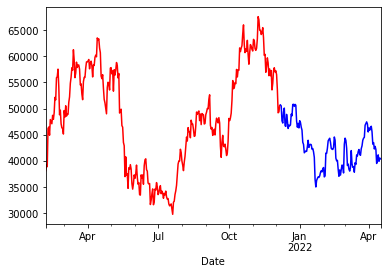

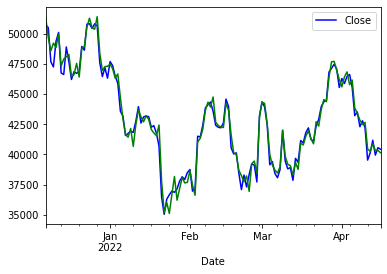

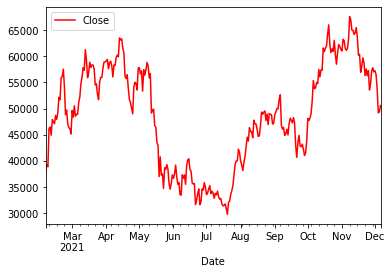

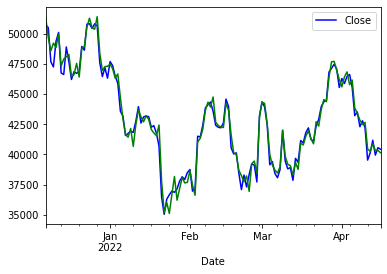

In [ ]:
df.index=pd.to_datetime(df['Date'],format='%Y-%m-%d')
# interpolate missing values 

df.interpolate(method='time', inplace=True)

train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['Open',	'High',	'Low']
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)


In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')

R2 for Linear Regression model -> 99.31%


In [ ]:
# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')

R2 for Linear Regression model -> 97.75%


##both

In [ ]:
df=data.copy()

[5.01165990e+04 4.72002390e+04 4.87576764e+04 1.71516880e+04
 2.36750120e-01 1.57799446e+08 2.13278689e+00]
MSE for Logistic Regression Baseline : 0.003913539352214253
(131, 7) (131, 1)


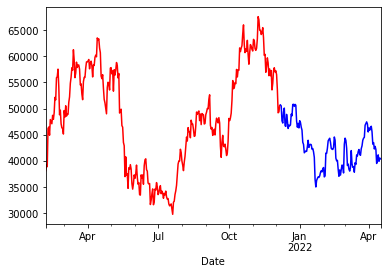

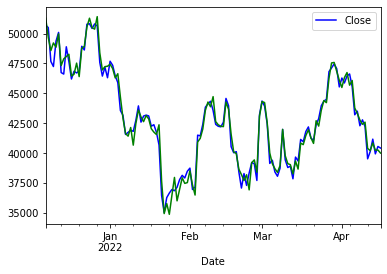

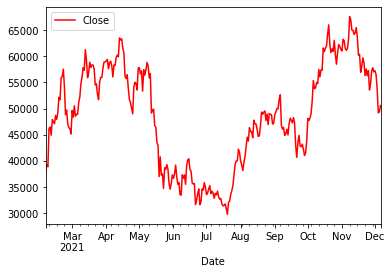

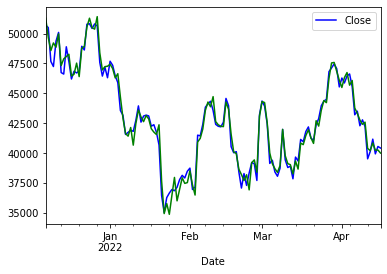

In [ ]:
df.index=pd.to_datetime(df['Date'],format='%Y-%m-%d')
# interpolate missing values 

#df.interpolate(method='time', inplace=True)

train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['High',	'Low','Open',	'Tweet_volume',	'Avg_score',"sum_followers","sum_prof"]
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)


In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')

R2 for Linear Regression model -> 99.31%


In [ ]:
# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')

R2 for Linear Regression model -> 97.71%


#dont

In [ ]:
train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]


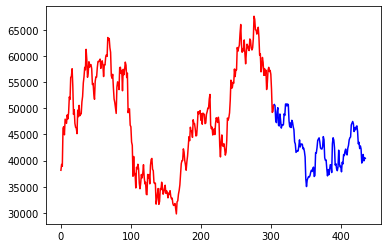

In [ ]:
train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

In [ ]:
#features & target for the model

features = ['Open', 'High', 'Low', 'Volume', 'Tweet_volume', 'Avg_score_norm']
target = ['Close']

In [ ]:
#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])

KeyError: ignored

In [ ]:
featureScaler.mean_

In [ ]:
WINDOW_SIZE = 10

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

In [ ]:
print(X_train)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


In [ ]:
# Logistic Regression baseline model

regressor = LinearRegression()

In [ ]:
# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output

#train
regressor.fit(X_train,Y_train)

In [ ]:
#test
predictions = regressor.predict(X_test)

loss = mse(predictions,Y_test)

print(f'MSE for Logistic Regression Baseline : {loss}')


In [ ]:
pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

In [ ]:
compare_pred(predictions)

In [ ]:
plot_predictions(predictions)

In [ ]:
X_train.shape, Y_train.shape

In [ ]:
X_test.shape, Y_test.shape

#trials


##only Avg_score window

In [ ]:
df=data.copy()
a=[]
b=[]

In [ ]:
df.shape

(436, 7)

In [ ]:
#window of n
#3,5,7,10,15,25,45,80,100
n=100 
summ=2**n - 1
newAvg_score=[]
count=0
for i in range(n-1,df.shape[0]):
  t=0
  for j in range(n):
    t+=(2**j)*df[ "Avg_score"][i-n+j+1]
  #t=(4/7)*df[ "Avg_score"][i]+(2/7)*df[ "Avg_score"][i-1]+(1/7)*(df[ "Avg_score"][i-2])
  newAvg_score.append(t)
df = df.iloc[n-1:]
df["Avg_score"]=newAvg_score

<ipython-input-142-4fa07ca19e16>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avg_score"]=newAvg_score


[5.11211890e+04 2.85661571e+04 2.53932177e+78]
[51056.14573759]
MSE for Logistic Regression Baseline : 0.031882992863299514
(59, 3) (59, 1)


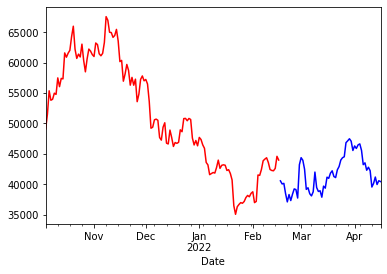

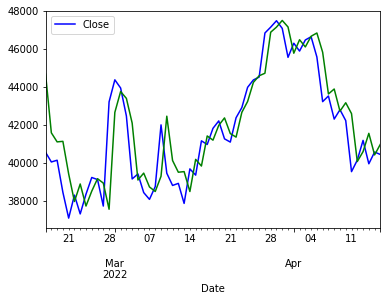

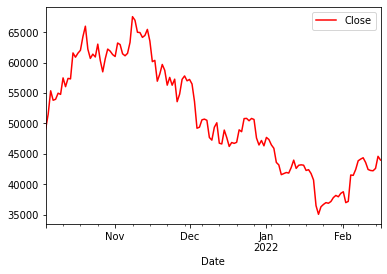

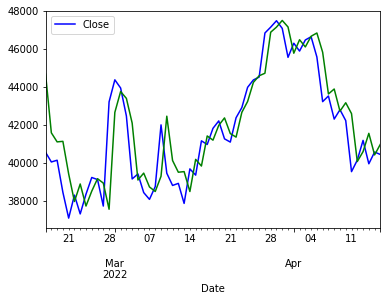

In [ ]:
"""a=[]
b=[]"""
train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['Open', 'Tweet_volume',	'Avg_score']
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)
print(targetScaler.mean_)

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)

for i in features:
  a.append(i+"_mean")
a.append(target[0]+"_mean")
for i in featureScaler.mean_:
  b.append(i)
b.append(targetScaler.mean_)
a+=["MSE","R2 score on Training set","R2 score on Testing Accuracy"]

b.append(loss)

In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

from prettytable import PrettyTable
A = PrettyTable()
A.add_column("ONLY TWEET AGGREGATES",a)
A.add_column("",b)
print(A)

R2 for Linear Regression model -> 96.61%
R2 for Linear Regression model -> 68.06%
+------------------------------+------------------------+
|    ONLY TWEET AGGREGATES     |                        |
+------------------------------+------------------------+
|          Open_mean           |   48831.75373220916    |
|      Tweet_volume_mean       |   17248.491199119915   |
|        Avg_score_mean        |   10491.769410388713   |
|          Close_mean          |    [48862.41478445]    |
|             MSE              |  0.021019089032783968  |
|   R2 score on Training set   |         95.75%         |
| R2 score on Testing Accuracy |         86.61%         |
|          Open_mean           |   48925.179681011214   |
|      Tweet_volume_mean       |   17427.949833887043   |
|        Avg_score_mean        |    326612.072188612    |
|          Close_mean          |    [48936.93477471]    |
|             MSE              |  0.021134363254813056  |
|   R2 score on Training set   |         95.94% 

## score and volume

In [ ]:
df=data.copy()
a=[]
b=[]

In [ ]:
#window of n
#2,3,4,7,10,20,45,80,90
n=90 
summ=2**n - 1
newAvg_score=[]
newVolume=[]
count=0
for i in range(n-1,df.shape[0]):
  as_var=0
  av_var=0
  for j in range(n):
    as_var+=(2**j)*df[ "Avg_score"][i-n+j+1]
    av_var+=(2**j)*df[ "Tweet_volume"][i-n+j+1]
  newAvg_score.append(as_var)
  newVolume.append(av_var)
df = df.iloc[n-1:]
df["Avg_score"]=newAvg_score
df[ "Tweet_volume"]=newVolume

<ipython-input-178-61401351d62a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avg_score"]=newAvg_score
<ipython-input-178-61401351d62a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ "Tweet_volume"]=newVolume


[5.06596170e+04 6.62163639e+82 3.63370286e+81]
[50488.87265015]
MSE for Logistic Regression Baseline : 0.025912759529007845
(56, 3) (56, 1)


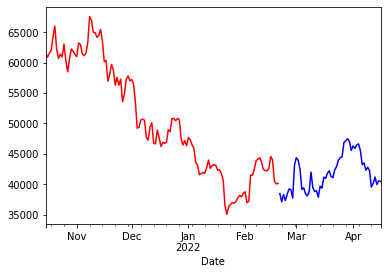

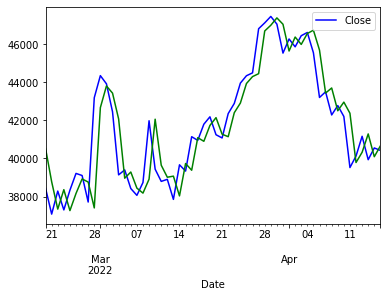

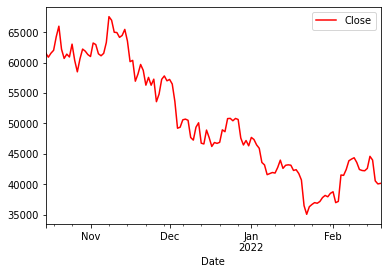

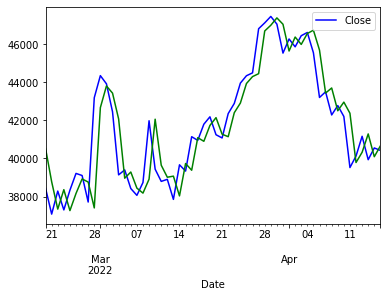

In [ ]:
"""a=[]
b=[]"""
train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

#features & target for the model

features = ['Open', 'Tweet_volume',	'Avg_score']
target = ['Close']

#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])
print(featureScaler.mean_)
print(targetScaler.mean_)

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df)

# Logistic Regression baseline model
regressor = LinearRegression()

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output
#train
regressor.fit(X_train,Y_train)

#test
predictions = regressor.predict(X_test)
loss = mse(predictions,Y_test)
print(f'MSE for Logistic Regression Baseline : {loss}')

pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

compare_pred(predictions)
plot_predictions(predictions)

print(X_test.shape, Y_test.shape)

for i in features:
  a.append(i+"_mean")
a.append(target[0]+"_mean")
for i in featureScaler.mean_:
  b.append(i)
b.append(targetScaler.mean_)
a+=["MSE","R2 score on Training set","R2 score on Testing Accuracy"]

b.append(loss)

In [ ]:
#training accuracy
regressor_predictions = regressor.predict(X_train)
regressor_r2 = calculate_r2(regressor_predictions, train_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

# calculate R2 metrics

regressor_predictions = regressor.predict(X_test)
regressor_r2 = calculate_r2(regressor_predictions, test_df['Close'])
print(f'R2 for Linear Regression model -> {regressor_r2:.2f}%')
b.append(f'{regressor_r2:.2f}%')

from prettytable import PrettyTable
A = PrettyTable()
A.add_column("ONLY TWEET AGGREGATES",a)
A.add_column("",b)
print(A)

R2 for Linear Regression model -> 96.74%
R2 for Linear Regression model -> 74.89%
+------------------------------+------------------------+
|    ONLY TWEET AGGREGATES     |                        |
+------------------------------+------------------------+
|          Open_mean           |   48796.57818282278    |
|      Tweet_volume_mean       |   51536.88541666667    |
|        Avg_score_mean        |   4488.779790412937    |
|          Close_mean          |    [48830.8476691]     |
|             MSE              |  0.021028065224720414  |
|   R2 score on Training set   |         95.77%         |
| R2 score on Testing Accuracy |         86.58%         |
|          Open_mean           |   48869.15187319513    |
|      Tweet_volume_mean       |   362248.97480748076   |
|        Avg_score_mean        |   31519.038640432434   |
|          Close_mean          |    [48901.34760468]    |
|             MSE              |  0.02122118009844493   |
|   R2 score on Training set   |         95.74% 

## score by volume